In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
members=pd.read_csv("members.csv")
songs=pd.read_csv("songs.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [6]:
df=train.sample(frac=0.5)

In [7]:
data=pd.merge(df, songs, on='song_id', how='left')


In [8]:
data=pd.merge(data,members, on='msno', how='left')

In [9]:
data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,VXM7GRZQRl2ySWN7bwml4+rXylcQ7+lrQZhrPD9mGRM=,nLSD1C3Lw8VnrzV1M5vXj9WDQgcTsUbt/ylc0NCpc6w=,discover,Online playlist more,online-playlist,1,291596.0,465,信 (Shin),方炯鑌,姚若龍,3.0,1,0,NaN,3,20140518,20180527
1,L9zh+TXRTRMUo7GFz1LxKOjwrj//qVTaU6URDqpl29g=,cTan6C18/5jb9rFodGMKWebp6wmu8iX7gPuKcmUCzsQ=,my library,NaN,local-library,0,225786.0,465,Avril Lavigne,Shellback|艾薇兒|Max Martin,Shellback|艾薇兒|Max Martin,52.0,5,27,female,3,20150912,20170812
2,3i0jlUKhqqUKqFsoJVgN2UcDOuri7fCiE33XUCnKHXo=,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,discover,Discover Chart,online-playlist,1,280084.0,465,林俊傑 (JJ Lin),林俊傑,林怡鳳,3.0,9,30,male,9,20070616,20170716
3,6jK67EJWKI+RTN+Z15E2rjlkIDKZzY4F6j/hxV073LM=,+FpsOpBTOrZIZ+EprMSnZQGPzMYOIThM47/b7bzA8lY=,discover,Album more,album,1,166870.0,444,After School| BlackPink| Tara,NaN,NaN,31.0,14,25,female,7,20161224,20170923
4,VF/3OvUE/qUAo1k8T+ThSPx//jNUraEpb704Nlja8Dk=,ux/PB58L/hRawCr/Np/pidrwc9VICotE744s2ujSj/M=,radio,Radio,radio,0,211905.0,1609,OM:Dance Essentials,NaN,NaN,52.0,1,0,NaN,7,20160128,20170930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688704,ItVWiES9MtxVNUaYsp160+rvz3cV2lnDoA6x/NquPbw=,hyUrPcM9fy2bxiau9S+unKY38hKS4rCKiFJGO9TKNVM=,my library,Local playlist more,local-playlist,1,239211.0,465,Michael Jackson,NaN,NaN,52.0,13,35,male,9,20101207,20171208
3688705,UjA3o9dLyMY6NDZz8XceX1E39YWKjhJhXxY4Vr3WhKY=,HriTBy0YRRKVzc+1UDL/W7jH3U9fWQqDQTrUG8KhHfE=,radio,Radio,radio,0,185078.0,465,轟天牛,佚名,佚名,3.0,1,0,NaN,7,20160215,20170228
3688706,zx51OvMA6lJ+iNxD6lZnUppO8ZKHhuKBIAgGXAObgqQ=,TLU46LbiJ+1mmJr4Le4Z5eaUQq3TiXgdZpE5EtR4WZI=,my library,Local playlist more,local-library,1,266866.0,465,Maroon 5,NaN,NaN,52.0,13,27,female,4,20151112,20170809
3688707,JXL4rwo4S6knJeL23wRE99TZkbpUXAmC9+Ac1YVo/dE=,4yqn5wC64YsV6sjebxrVJmp5H6i+roAX1NxN/rSXTq4=,search,Online playlist more,online-playlist,0,228623.0,359,Spoon,Britt Daniel| Sean Dineen,NaN,52.0,1,0,NaN,4,20170119,20170614


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688709 entries, 0 to 3688708
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 506.6+ MB


In [11]:
data.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,3.688709e+06,3.688651e+06,3.688636e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,5.036778e-01,2.450769e+05,1.861160e+01,7.508677e+00,1.754767e+01,6.795373e+00,2.012808e+07,2.017157e+07
std,4.999865e-01,6.667062e+04,2.117844e+01,6.639101e+00,2.165467e+01,2.275984e+00,3.019161e+04,3.883958e+03
min,0.000000e+00,1.950000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07
50%,1.000000e+00,2.417890e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07
75%,1.000000e+00,2.721600e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07
max,1.000000e+00,1.079997e+07,5.900000e+01,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07


In [12]:
dtypes=pd.DataFrame(data.dtypes,columns=['Data Type'])
dtypes["Unique Values"]=data.nunique().sort_values(ascending=True)

dtypes["Null Values"]=data.isnull().sum()

dtypes["% null Values"]=data.isnull().sum()/len(data)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,27574,1589086,0.430797
gender,object,2,1480335,0.401315
composer,object,59616,837163,0.226953
source_screen_name,object,20,207283,0.056194
genre_ids,object,527,59456,0.016118
source_system_tab,object,8,12309,0.003337
source_type,object,12,10691,0.002898
language,float64,10,73,0.000020
song_length,float64,49763,58,0.000016
artist_name,object,32409,58,0.000016


In [13]:
data.isnull().sum()

msno                            0
song_id                         0
source_system_tab           12309
source_screen_name         207283
source_type                 10691
target                          0
song_length                    58
genre_ids                   59456
artist_name                    58
composer                   837163
lyricist                  1589086
language                       73
city                            0
bd                              0
gender                    1480335
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

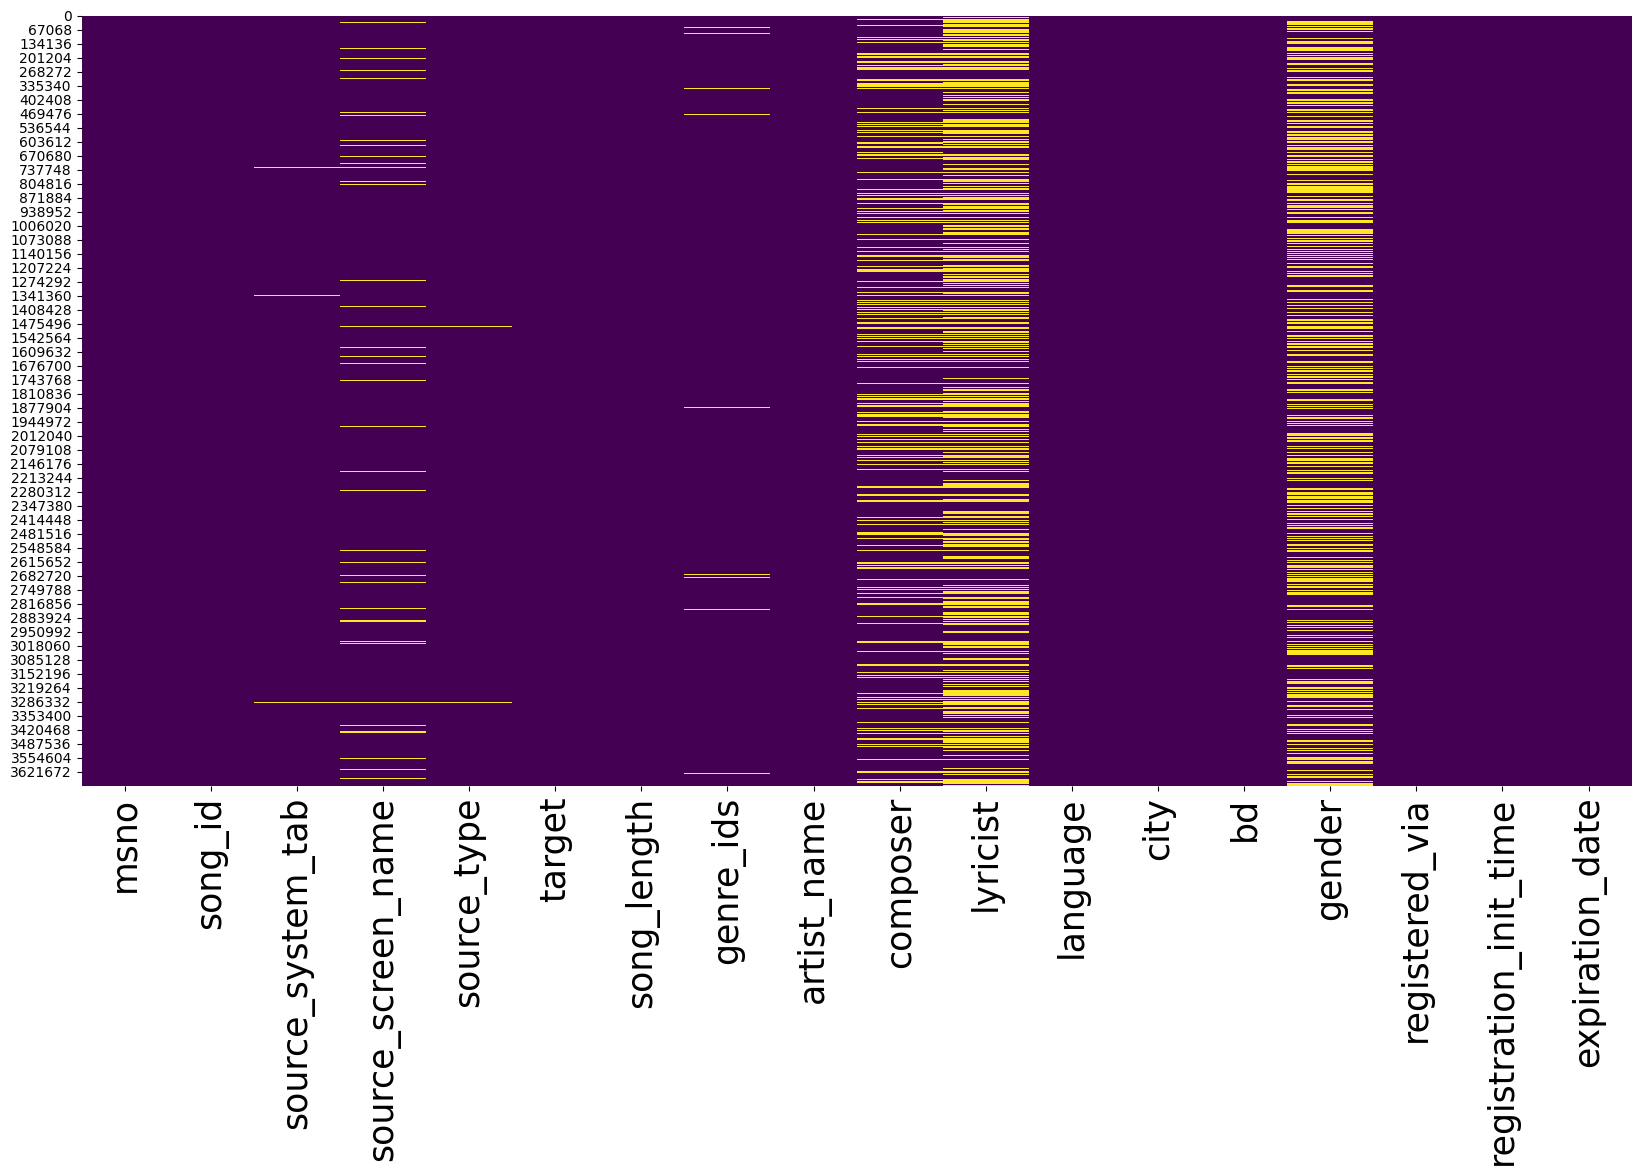

In [14]:
plt.figure(figsize=(20,10))

sn.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.tick_params(axis='x', labelsize=25)

In [15]:
for col in data.select_dtypes(include=['object']).columns:
    data[col]=data[col].fillna(value="unknown")

for col in data.select_dtypes(exclude=['object']).columns:
    data[col]=data[col].fillna(value=data[col].mean())

In [16]:
data.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [18]:
data['registration_init_time_year']=pd.DatetimeIndex(data['registration_init_time']).year
data['registration_init_time_month']=pd.DatetimeIndex(data['registration_init_time']).month
data['registration_init_time_day']=pd.DatetimeIndex(data['registration_init_time']).day

data['expiration_date_year'] = pd.DatetimeIndex(data['expiration_date']).year
data['expiration_date_month']=pd.DatetimeIndex( data['expiration_date']).month
data['expiration_date_day'] = pd.DatetimeIndex(data['expiration_date']).day


In [20]:
data['registration_init_time'] = data['registration_init_time'].astype('category')
data['expiration_date'] = data['expiration_date'].astype('category')

In [21]:
for col in data.select_dtypes(include=['object']).columns:
    data[col]=data[col].astype('category')
for col in data.select_dtypes(include=['category']).columns:
    data[col]=data[col].cat.codes

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688709 entries, 0 to 3688708
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   msno                          int16  
 1   song_id                       int32  
 2   source_system_tab             int8   
 3   source_screen_name            int8   
 4   source_type                   int8   
 5   target                        int64  
 6   song_length                   float64
 7   genre_ids                     int16  
 8   artist_name                   int16  
 9   composer                      int32  
 10  lyricist                      int16  
 11  language                      float64
 12  city                          int64  
 13  bd                            int64  
 14  gender                        int8   
 15  registered_via                int64  
 16  registration_init_time        int16  
 17  expiration_date               int16  
 18  registration_init_time

In [23]:
data.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,...,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3688709.0,3688709.0,3688709.0,3688709.0,3688709.0,3688709.0
mean,1.504321e+04,1.294721e+05,2.440013e+00,9.085128e+00,4.764220e+00,5.036778e-01,2.450769e+05,3.005058e+02,2.189217e+04,4.194711e+04,...,1.114096e+00,6.795373e+00,2.536232e+03,9.481976e+02,1970.0,1.0,1.0,1970.0,1.0,1.0
std,8.673064e+03,7.485807e+04,1.890689e+00,4.592766e+00,2.467576e+00,4.999865e-01,6.667010e+04,9.045934e+01,1.002874e+04,1.650047e+04,...,8.218980e-01,2.275984e+00,9.637803e+02,1.120214e+02,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.950000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1970.0,1.0,1.0,1970.0,1.0,1.0
25%,7.531000e+03,6.446800e+04,0.000000e+00,8.000000e+00,3.000000e+00,0.000000e+00,2.147260e+05,3.070000e+02,1.403000e+04,3.011300e+04,...,0.000000e+00,4.000000e+00,1.938000e+03,9.370000e+02,1970.0,1.0,1.0,1970.0,1.0,1.0
50%,1.514100e+04,1.289760e+05,3.000000e+00,8.000000e+00,4.000000e+00,1.000000e+00,2.417890e+05,3.130000e+02,2.722500e+04,5.040800e+04,...,1.000000e+00,7.000000e+00,2.665000e+03,9.520000e+02,1970.0,1.0,1.0,1970.0,1.0,1.0
75%,2.260100e+04,1.930740e+05,3.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,2.721600e+05,3.130000e+02,2.960100e+04,5.322600e+04,...,2.000000e+00,9.000000e+00,3.395000e+03,9.620000e+02,1970.0,1.0,1.0,1970.0,1.0,1.0
max,2.999200e+04,2.596820e+05,8.000000e+00,2.000000e+01,1.200000e+01,1.000000e+00,1.079997e+07,5.270000e+02,3.240900e+04,5.961500e+04,...,2.000000e+00,1.300000e+01,3.798000e+03,1.366000e+03,1970.0,1.0,1.0,1970.0,1.0,1.0


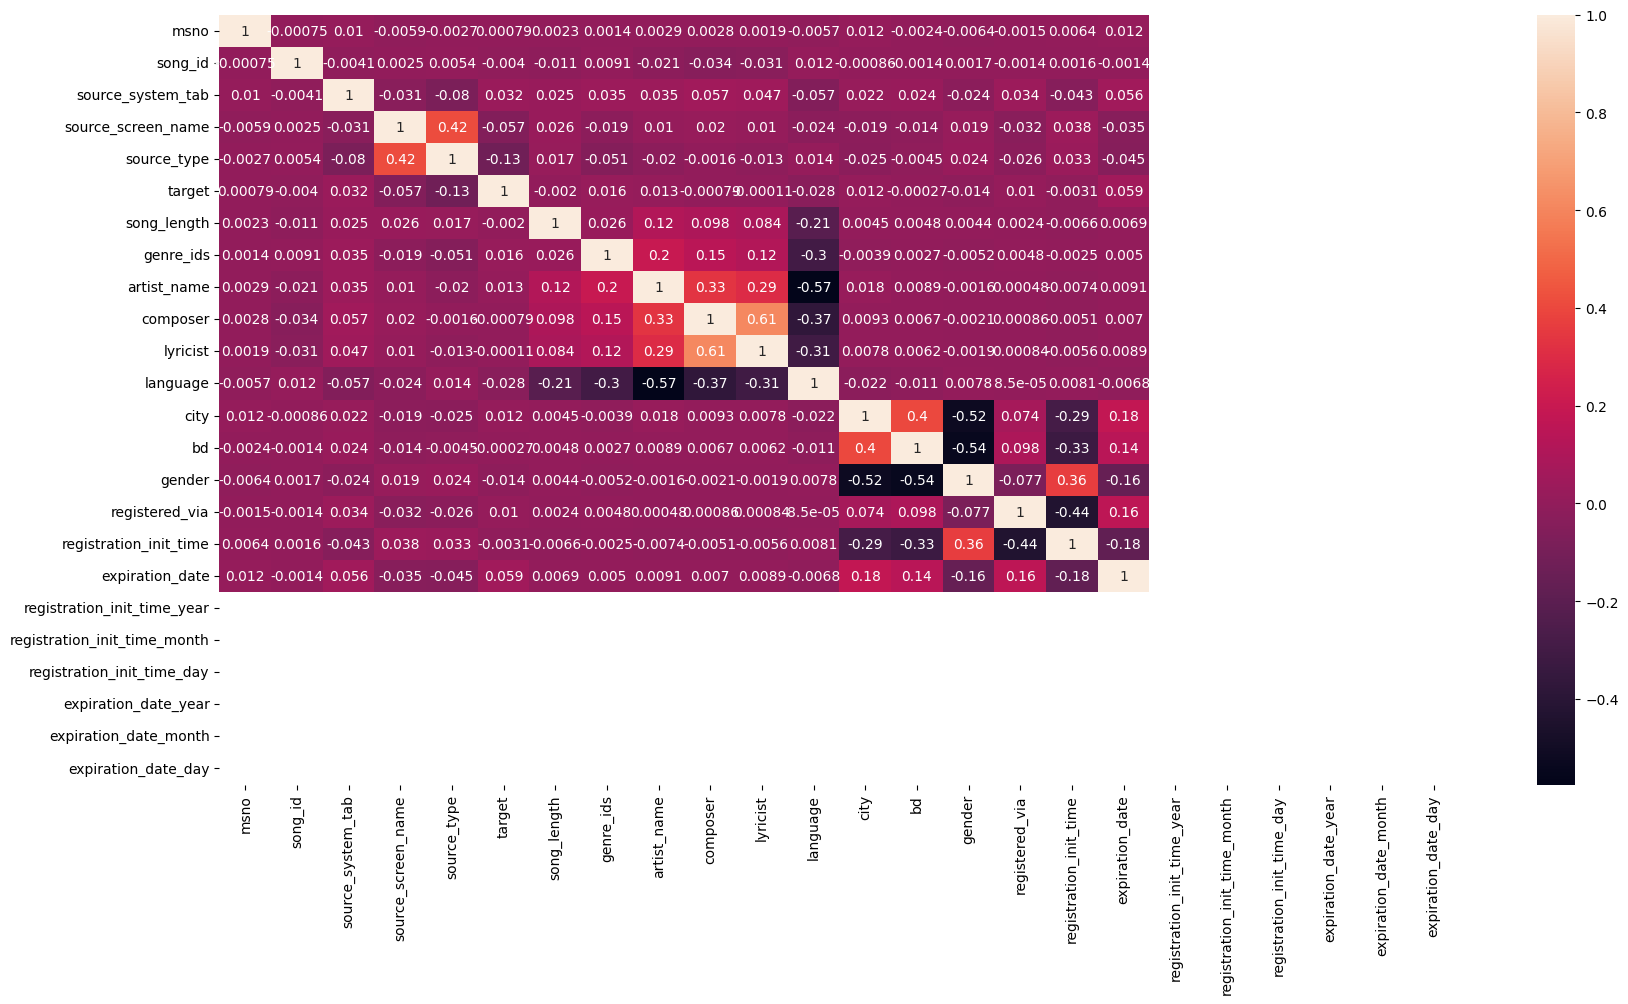

In [27]:
plt.figure(figsize=(20,10))
sn.heatmap(data.corr(), annot=True)
plt.show()

In [28]:
target = data.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split( data , target, test_size = 0.2)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(2950967, 23)
(2950967,)
(737742, 23)
(737742,)


In [29]:
RF = RandomForestClassifier()
RF.fit(train_data, train_labels)

RF_TrainScore = RF.score(train_data, train_labels)
RF_TrainScore

0.9999959335363628

In [30]:
RF_TestScore = RF.score(test_data, test_labels)
RF_TestScore

0.6996538085130032

In [31]:
y_pred_rf =RF.predict(test_data)

<Axes: >

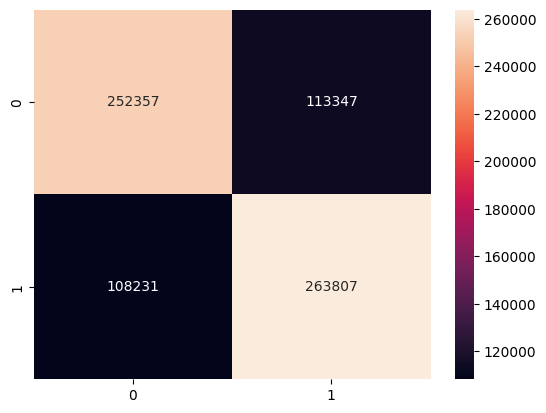

In [32]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(test_labels, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g')

In [33]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69    365704
           1       0.70      0.71      0.70    372038

    accuracy                           0.70    737742
   macro avg       0.70      0.70      0.70    737742
weighted avg       0.70      0.70      0.70    737742



In [35]:
df_plot = pd.DataFrame({'features': data.columns,
                        'importances': RF.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

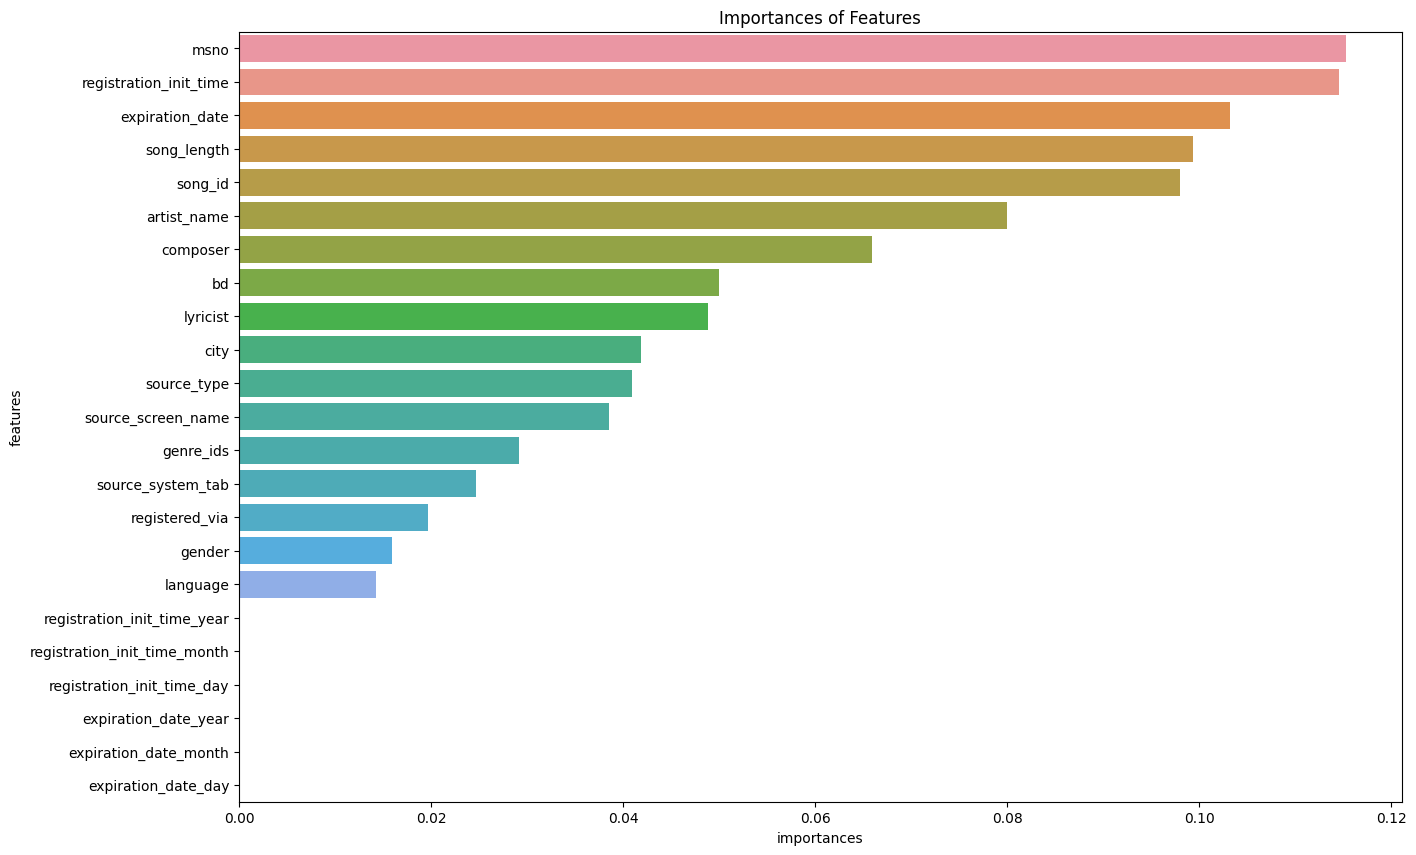

In [36]:
plt.figure(figsize=[15,10])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features')
plt.show()